# Novel Corona Virus 2019 Dataset
# Day level information on covid-19 affected cases

## Context
From World Health Organization - On 31 December 2019, WHO was alerted to several cases of pneumonia in Wuhan City, Hubei Province of China. The virus did not match any other known virus. This raised concern because when a virus is new, we do not know how it affects people.

So daily level information on the affected people can give some interesting insights when it is made available to the broader data science community.

Johns Hopkins University has made an excellent dashboard using the affected cases data. Data is extracted from the google sheets associated and made available here.

## Edited:
Now data is available as csv files in the Johns Hopkins Github repository. Please refer to the github repository for the Terms of Use details. Uploading it here for using it in Kaggle kernels and getting insights from the broader DS community.

## Content
2019 Novel Coronavirus (2019-nCoV) is a virus (more specifically, a coronavirus) identified as the cause of an outbreak of respiratory illness first detected in Wuhan, China. Early on, many of the patients in the outbreak in Wuhan, China reportedly had some link to a large seafood and animal market, suggesting animal-to-person spread. However, a growing number of patients reportedly have not had exposure to animal markets, indicating person-to-person spread is occurring. At this time, it’s unclear how easily or sustainably this virus is spreading between people - CDC

This dataset has daily level information on the number of affected cases, deaths and recovery from 2019 novel coronavirus. Please note that this is a time series data and so the number of cases on any given day is the cumulative number.

The data is available from 22 Jan, 2020.

## Column Description
Main file in this dataset is covid_19_data.csv and the detailed descriptions are below.

covid_19_data.csv

Sno - Serial number
ObservationDate - Date of the observation in MM/DD/YYYY
Province/State - Province or state of the observation (Could be empty when missing)
Country/Region - Country of observation
Last Update - Time in UTC at which the row is updated for the given province or country. (Not standardised and so please clean before using it)
Confirmed - Cumulative number of confirmed cases till that date
Deaths - Cumulative number of of deaths till that date
Recovered - Cumulative number of recovered cases till that date
2019_ncov_data.csv

This is older file and is not being updated now. Please use the covid_19_data.csv file

Added two new files with individual level information

### COVID_open_line_list_data.csv
This file is obtained from this link

### COVID19_line_list_data.csv
This files is obtained from this link

### Country level datasets
If you are interested in knowing country level data, please refer to the following Kaggle datasets:
India - https://www.kaggle.com/sudalairajkumar/covid19-in-india
South Korea - https://www.kaggle.com/kimjihoo/coronavirusdataset
Italy - https://www.kaggle.com/sudalairajkumar/covid19-in-italy
Brazil - https://www.kaggle.com/unanimad/corona-virus-brazil
USA - https://www.kaggle.com/sudalairajkumar/covid19-in-usa
Switzerland - https://www.kaggle.com/daenuprobst/covid19-cases-switzerland
Indonesia - https://www.kaggle.com/ardisragen/indonesia-coronavirus-cases

### Acknowledgements
Johns Hopkins University for making the data available for educational and academic research purposes
MoBS lab - https://www.mobs-lab.org/2019ncov.html
World Health Organization (WHO): https://www.who.int/
DXY.cn. Pneumonia. 2020. http://3g.dxy.cn/newh5/view/pneumonia.
BNO News: https://bnonews.com/index.php/2020/02/the-latest-coronavirus-cases/
National Health Commission of the People’s Republic of China (NHC):
http://www.nhc.gov.cn/xcs/yqtb/list_gzbd.shtml
China CDC (CCDC): http://weekly.chinacdc.cn/news/TrackingtheEpidemic.htm
Hong Kong Department of Health: https://www.chp.gov.hk/en/features/102465.html
Macau Government: https://www.ssm.gov.mo/portal/
Taiwan CDC: https://sites.google.com/cdc.gov.tw/2019ncov/taiwan?authuser=0
US CDC: https://www.cdc.gov/coronavirus/2019-ncov/index.html
Government of Canada: https://www.canada.ca/en/public-health/services/diseases/coronavirus.html
Australia Government Department of Health: https://www.health.gov.au/news/coronavirus-update-at-a-glance
European Centre for Disease Prevention and Control (ECDC): https://www.ecdc.europa.eu/en/geographical-distribution-2019-ncov-cases
Ministry of Health Singapore (MOH): https://www.moh.gov.sg/covid-19
Italy Ministry of Health: http://www.salute.gov.it/nuovocoronavirus
Picture courtesy : Johns Hopkins University dashboard

## Inspiration
Some insights could be

Changes in number of affected cases over time

Change in cases over time at country level

Latest number of affected cases

## I have Use FB-Prophet for predicting Next 35 Days .. 
## FB Prophet is Time Series Tool

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as pyo
from plotly.offline import init_notebook_mode, plot, iplot
import cufflinks as cf 

In [2]:
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
pd.options.display.float_format = '{:.2f}'.format

In [7]:
df = pd.read_csv('covid_19_data.csv')

df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.00,0.00,0.00
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.00,0.00,0.00
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.00,0.00,0.00
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.00,0.00,0.00
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.00,0.00,0.00


In [8]:
df.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
205946,205947,01/19/2021,Zaporizhia Oblast,Ukraine,2021-01-20 05:21:54,62492.00,738.00,39168.00
205947,205948,01/19/2021,Zeeland,Netherlands,2021-01-20 05:21:54,13031.00,149.00,0.00
205948,205949,01/19/2021,Zhejiang,Mainland China,2021-01-20 05:21:54,1316.00,1.00,1298.00
205949,205950,01/19/2021,Zhytomyr Oblast,Ukraine,2021-01-20 05:21:54,42758.00,707.00,37834.00
205950,205951,01/19/2021,Zuid-Holland,Netherlands,2021-01-20 05:21:54,224398.00,3153.00,0.00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205951 entries, 0 to 205950
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              205951 non-null  int64  
 1   ObservationDate  205951 non-null  object 
 2   Province/State   150574 non-null  object 
 3   Country/Region   205951 non-null  object 
 4   Last Update      205951 non-null  object 
 5   Confirmed        205951 non-null  float64
 6   Deaths           205951 non-null  float64
 7   Recovered        205951 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 12.6+ MB


In [10]:
df.rename(columns={'ObservationDate':'Date'},inplace=True)
df.rename(columns={'Province/State':'State'},inplace=True)
df.rename(columns={'Country/Region':'Country'},inplace=True)

In [11]:
df['Date']= pd.to_datetime(df['Date'])

In [12]:
df.head()

,SNo,Date,State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.00,0.00,0.00
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.00,0.00,0.00
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.00,0.00,0.00
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.00,0.00,0.00
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.00,0.00,0.00


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SNo,205951.00,102976.00,59453.08,1.00,51488.50,102976.00,154463.50,205951.00
Confirmed,205951.00,45401.48,143721.62,-302844.00,596.00,5361.00,26184.00,3049037.00
Deaths,205951.00,1262.63,4082.84,-178.00,7.00,101.00,713.00,80143.00
Recovered,205951.00,27663.48,133451.66,-854405.00,11.00,1028.00,9880.00,6399531.00


In [14]:
df.isnull().sum()

SNo                0
Date               0
State          55377
Country            0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

# Confirmed Case According to Date..

In [15]:
Confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()

In [16]:
Confirmed

,Date,Confirmed
0,2020-01-22,557.00
1,2020-01-23,1097.00
2,2020-01-24,941.00
3,2020-01-25,1437.00
4,2020-01-26,2118.00
...,...,...
359,2021-01-15,93876206.00
360,2021-01-16,94495403.00
361,2021-01-17,95045634.00
362,2021-01-18,95559647.00


# Death and Recovered Case According to Date..

In [17]:
Death = df.groupby('Date').sum()['Deaths'].reset_index()
Recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [18]:
Death

,Date,Deaths
0,2020-01-22,17.00
1,2020-01-23,34.00
2,2020-01-24,26.00
3,2020-01-25,42.00
4,2020-01-26,56.00
...,...,...
359,2021-01-15,2009092.00
360,2021-01-16,2022125.00
361,2021-01-17,2030831.00
362,2021-01-18,2040107.00


In [19]:
Recovered

,Date,Recovered
0,2020-01-22,30.00
1,2020-01-23,60.00
2,2020-01-24,39.00
3,2020-01-25,42.00
4,2020-01-26,56.00
...,...,...
359,2021-01-15,51685853.00
360,2021-01-16,52005821.00
361,2021-01-17,52318440.00
362,2021-01-18,52634885.00


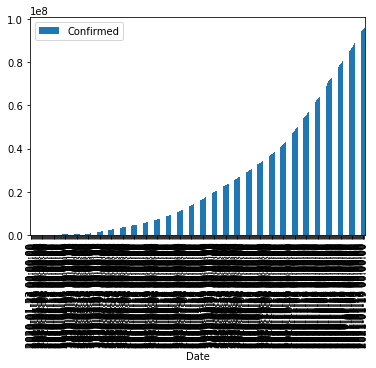

In [20]:
Confirmed.plot(kind='bar',x='Date',y='Confirmed')

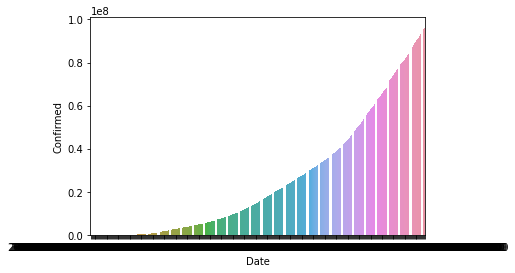

In [21]:
sns.barplot(x=Confirmed['Date'],y=Confirmed['Confirmed'])

In [22]:
Confirmed.iplot(kind='bar',x='Date',y='Confirmed')

In [23]:
Death.iplot(kind='bar',x='Date',y='Deaths')

In [24]:
Recovered.iplot(kind='bar',x='Date',y='Recovered')

### Now Lets Predict Next 35 Days

# Prediction For Confirmed Case 

In [25]:
from fbprophet import Prophet

In [27]:
df.head()

,SNo,Date,State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.00,0.00,0.00
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.00,0.00,0.00
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.00,0.00,0.00
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.00,0.00,0.00
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.00,0.00,0.00


In [28]:
Confirmed.head()

,Date,Confirmed
0,2020-01-22,557.00
1,2020-01-23,1097.00
2,2020-01-24,941.00
3,2020-01-25,1437.00
4,2020-01-26,2118.00


In [31]:
Confirmed.tail()

,Date,Confirmed
359,2021-01-15,93876206.00
360,2021-01-16,94495403.00
361,2021-01-17,95045634.00
362,2021-01-18,95559647.00
363,2021-01-19,96158735.00


In [29]:
Death.head()

,Date,Deaths
0,2020-01-22,17.00
1,2020-01-23,34.00
2,2020-01-24,26.00
3,2020-01-25,42.00
4,2020-01-26,56.00


In [32]:
Death.tail()

,Date,Deaths
359,2021-01-15,2009092.00
360,2021-01-16,2022125.00
361,2021-01-17,2030831.00
362,2021-01-18,2040107.00
363,2021-01-19,2056996.00


In [30]:
Recovered.head()

,Date,Recovered
0,2020-01-22,30.00
1,2020-01-23,60.00
2,2020-01-24,39.00
3,2020-01-25,42.00
4,2020-01-26,56.00


In [33]:
Recovered.tail()

,Date,Recovered
359,2021-01-15,51685853.00
360,2021-01-16,52005821.00
361,2021-01-17,52318440.00
362,2021-01-18,52634885.00
363,2021-01-19,53035240.00


In [ ]:
# date = ds(datestamp) and column = (y)
# Prophet take datestamp in (YYYY-MM-DD)

In [34]:
Confirmed.columns = ['ds','y']
Confirmed

,ds,y
0,2020-01-22,557.00
1,2020-01-23,1097.00
2,2020-01-24,941.00
3,2020-01-25,1437.00
4,2020-01-26,2118.00
...,...,...
359,2021-01-15,93876206.00
360,2021-01-16,94495403.00
361,2021-01-17,95045634.00
362,2021-01-18,95559647.00


In [35]:
model = Prophet(interval_width=0.95)  # interval_width is a confindent interval 95% ur model is correct and 5% of error
model.fit(Confirmed)

In [53]:
# Creating Feature Date DataFrame 
feature = model.make_future_dataframe(periods=35) # we have to predict next 35 days
feature.tail(35)

,ds
364,2021-01-20
365,2021-01-21
366,2021-01-22
367,2021-01-23
368,2021-01-24
369,2021-01-25
370,2021-01-26
371,2021-01-27
372,2021-01-28
373,2021-01-29


In [54]:
forecast = model.predict(feature)

In [55]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-12273.68,-383599.14,316722.01,-12273.68,-12273.68,-23898.98,-23898.98,-23898.98,-23898.98,-23898.98,-23898.98,0.00,0.00,0.00,-36172.67
1,2020-01-23,-9502.23,-338893.35,318457.72,-9502.23,-9502.23,17979.38,17979.38,17979.38,17979.38,17979.38,17979.38,0.00,0.00,0.00,8477.14
2,2020-01-24,-6730.78,-289658.01,367618.35,-6730.78,-6730.78,41471.42,41471.42,41471.42,41471.42,41471.42,41471.42,0.00,0.00,0.00,34740.63
3,2020-01-25,-3959.34,-284003.52,392420.15,-3959.34,-3959.34,40169.28,40169.28,40169.28,40169.28,40169.28,40169.28,0.00,0.00,0.00,36209.94
4,2020-01-26,-1187.89,-326997.95,343401.69,-1187.89,-1187.89,506.78,506.78,506.78,506.78,506.78,506.78,0.00,0.00,0.00,-681.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,2021-02-19,115469943.70,113558353.39,117697225.87,113447635.67,117622117.60,41471.42,41471.42,41471.42,41471.42,41471.42,41471.42,0.00,0.00,0.00,115511415.12
395,2021-02-20,116105458.96,114111586.52,118391909.01,114002606.81,118356927.93,40169.28,40169.28,40169.28,40169.28,40169.28,40169.28,0.00,0.00,0.00,116145628.24
396,2021-02-21,116740974.22,114492088.85,119116998.42,114569328.33,119109541.80,506.78,506.78,506.78,506.78,506.78,506.78,0.00,0.00,0.00,116741480.99
397,2021-02-22,117376489.47,114995323.10,119790300.37,115105112.76,119859170.22,-37258.89,-37258.89,-37258.89,-37258.89,-37258.89,-37258.89,0.00,0.00,0.00,117339230.58


In [56]:
# we have to focus only on fore columns

forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(60)

,ds,yhat,yhat_lower,yhat_upper
339,2020-12-26,80556773.87,80214443.18,80912576.12
340,2020-12-27,81152626.62,80818162.01,81492726.17
341,2020-12-28,81750376.21,81404325.39,82079776.08
342,2020-12-29,82384181.38,82053641.24,82689092.86
343,2020-12-30,83034766.63,82694941.70,83365037.32
344,2020-12-31,83712160.25,83326444.87,84039847.98
345,2021-01-01,84371167.54,84033123.50,84700252.52
346,2021-01-02,85005380.66,84661325.74,85345663.42
347,2021-01-03,85601233.42,85259378.28,85948519.07
348,2021-01-04,86198983.01,85844869.06,86558127.08


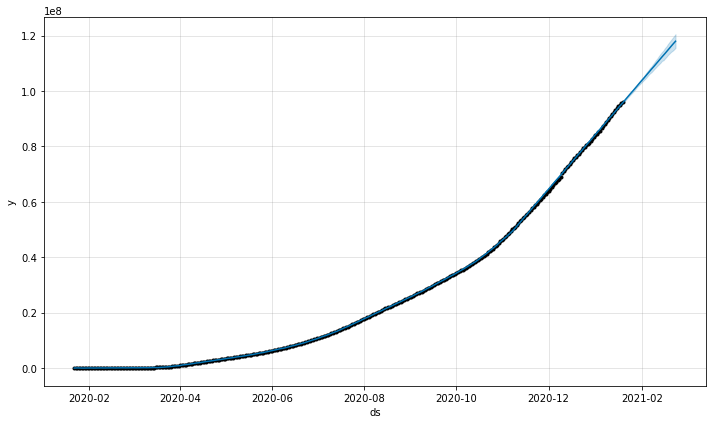

In [57]:
confirmed_forecast_plot = model.plot(forecast)

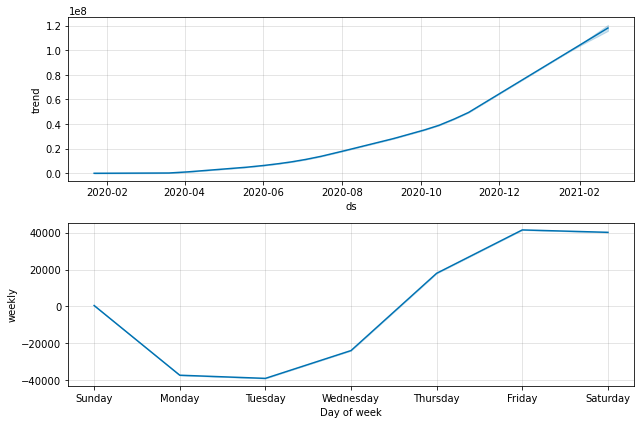

In [58]:
confirmed_forecast_plot_components = model.plot_components(forecast)

# Prediction of Death Case

In [60]:
Death.columns = ['ds','y']
Death

,ds,y
0,2020-01-22,17.00
1,2020-01-23,34.00
2,2020-01-24,26.00
3,2020-01-25,42.00
4,2020-01-26,56.00
...,...,...
359,2021-01-15,2009092.00
360,2021-01-16,2022125.00
361,2021-01-17,2030831.00
362,2021-01-18,2040107.00


In [61]:
model = Prophet(interval_width=0.95) 
model.fit(Death)

In [62]:
# Creating Feature Date DataFrame 
feature = model.make_future_dataframe(periods=35) # we have to predict next 35 days
feature.tail(35)

,ds
364,2021-01-20
365,2021-01-21
366,2021-01-22
367,2021-01-23
368,2021-01-24
369,2021-01-25
370,2021-01-26
371,2021-01-27
372,2021-01-28
373,2021-01-29


In [63]:
Death_forecast = model.predict(feature)

In [64]:
Death_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-859.91,-11192.36,9215.65,-859.91,-859.91,-108.55,-108.55,-108.55,-108.55,-108.55,-108.55,0.00,0.00,0.00,-968.46
1,2020-01-23,-754.73,-9324.96,10831.13,-754.73,-754.73,731.11,731.11,731.11,731.11,731.11,731.11,0.00,0.00,0.00,-23.62
2,2020-01-24,-649.54,-8739.91,11003.35,-649.54,-649.54,1391.21,1391.21,1391.21,1391.21,1391.21,1391.21,0.00,0.00,0.00,741.67
3,2020-01-25,-544.35,-9700.53,10872.02,-544.35,-544.35,1042.39,1042.39,1042.39,1042.39,1042.39,1042.39,0.00,0.00,0.00,498.05
4,2020-01-26,-439.16,-11066.05,8424.91,-439.16,-439.16,-647.72,-647.72,-647.72,-647.72,-647.72,-647.72,0.00,0.00,0.00,-1086.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,2021-02-19,2368626.92,2317223.70,2426014.77,2315208.15,2424419.35,1391.21,1391.21,1391.21,1391.21,1391.21,1391.21,0.00,0.00,0.00,2370018.12
395,2021-02-20,2379575.88,2321444.25,2439417.44,2324224.79,2437874.51,1042.39,1042.39,1042.39,1042.39,1042.39,1042.39,0.00,0.00,0.00,2380618.27
396,2021-02-21,2390524.84,2332952.32,2450926.70,2333246.66,2451704.93,-647.72,-647.72,-647.72,-647.72,-647.72,-647.72,0.00,0.00,0.00,2389877.12
397,2021-02-22,2401473.80,2341432.40,2461786.99,2341002.67,2465613.54,-1737.33,-1737.33,-1737.33,-1737.33,-1737.33,-1737.33,0.00,0.00,0.00,2399736.47


In [66]:
# we have to focus only on fore columns

Death_forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(40)

,ds,yhat,yhat_lower,yhat_upper
359,2021-01-15,1986804.43,1976867.33,1996846.16
360,2021-01-16,1997404.58,1987184.01,2008258.67
361,2021-01-17,2006663.43,1997527.34,2017006.87
362,2021-01-18,2016522.78,2006905.69,2026292.60
363,2021-01-19,2028537.96,2018772.24,2038373.19
364,2021-01-20,2040049.49,2030055.62,2050489.21
365,2021-01-21,2051838.11,2042078.42,2062433.73
366,2021-01-22,2063447.17,2053615.57,2072597.06
367,2021-01-23,2074047.32,2062980.15,2084596.91
368,2021-01-24,2083306.17,2072701.11,2094503.99


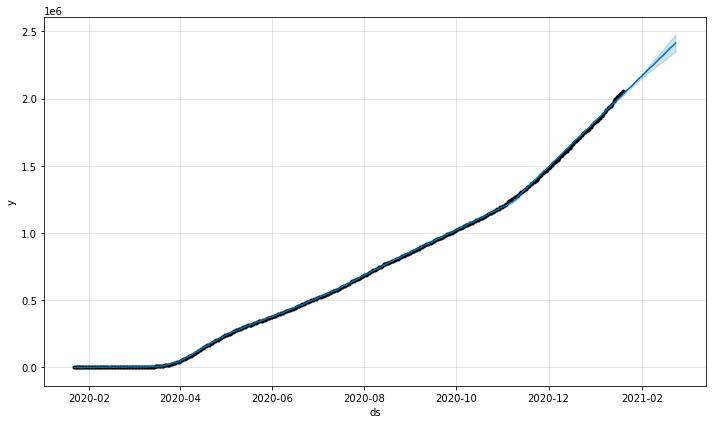

In [67]:
Death_forecast_plot = model.plot(Death_forecast)

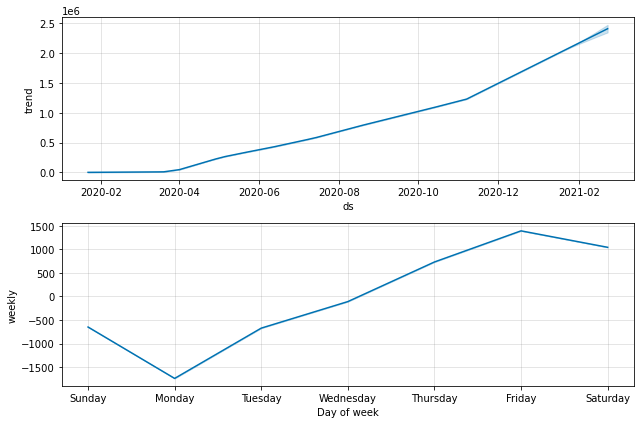

In [68]:
Death_forecast_plot_components = model.plot_components(Death_forecast)

# Prediction for Recovery Case

In [70]:
Recovered.columns = ['ds','y']
Recovered

,ds,y
0,2020-01-22,30.00
1,2020-01-23,60.00
2,2020-01-24,39.00
3,2020-01-25,42.00
4,2020-01-26,56.00
...,...,...
359,2021-01-15,51685853.00
360,2021-01-16,52005821.00
361,2021-01-17,52318440.00
362,2021-01-18,52634885.00


In [71]:
model = Prophet(interval_width=0.95) 
model.fit(Recovered)

In [72]:
# Creating Feature Date DataFrame 
feature = model.make_future_dataframe(periods=35) # we have to predict next 35 days
feature.tail(35)

,ds
364,2021-01-20
365,2021-01-21
366,2021-01-22
367,2021-01-23
368,2021-01-24
369,2021-01-25
370,2021-01-26
371,2021-01-27
372,2021-01-28
373,2021-01-29


In [73]:
Recovered_forecast = model.predict(feature)

In [74]:
Recovered_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-97801.49,-1344954.86,1148490.02,-97801.49,-97801.49,-27407.76,-27407.76,-27407.76,-27407.76,-27407.76,-27407.76,0.00,0.00,0.00,-125209.26
1,2020-01-23,-93730.78,-1333635.53,1191033.81,-93730.78,-93730.78,-13665.00,-13665.00,-13665.00,-13665.00,-13665.00,-13665.00,0.00,0.00,0.00,-107395.79
2,2020-01-24,-89660.08,-1383313.96,1191782.05,-89660.08,-89660.08,-14975.63,-14975.63,-14975.63,-14975.63,-14975.63,-14975.63,0.00,0.00,0.00,-104635.71
3,2020-01-25,-85589.37,-1276815.76,1203964.09,-85589.37,-85589.37,37559.72,37559.72,37559.72,37559.72,37559.72,37559.72,0.00,0.00,0.00,-48029.65
4,2020-01-26,-81518.66,-1424070.96,1251917.36,-81518.66,-81518.66,31270.63,31270.63,31270.63,31270.63,31270.63,31270.63,0.00,0.00,0.00,-50248.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,2021-02-19,61176848.58,59675421.07,62756650.21,60360163.47,62017253.89,-14975.63,-14975.63,-14975.63,-14975.63,-14975.63,-14975.63,0.00,0.00,0.00,61161872.94
395,2021-02-20,61445302.62,60053664.41,63074603.57,60577505.45,62313569.07,37559.72,37559.72,37559.72,37559.72,37559.72,37559.72,0.00,0.00,0.00,61482862.34
396,2021-02-21,61713756.66,60229052.45,63293850.33,60814147.33,62637899.79,31270.63,31270.63,31270.63,31270.63,31270.63,31270.63,0.00,0.00,0.00,61745027.29
397,2021-02-22,61982210.71,60374902.04,63704392.76,61051473.35,62950406.34,40813.29,40813.29,40813.29,40813.29,40813.29,40813.29,0.00,0.00,0.00,62023024.00


In [75]:
# we have to focus only on fore columns

Recovered_forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(40)

,ds,yhat,yhat_lower,yhat_upper
359,2021-01-15,51765981.40,50438011.33,53000546.55
360,2021-01-16,52086970.79,50867352.61,53430146.56
361,2021-01-17,52349135.75,51142479.88,53712587.25
362,2021-01-18,52627132.45,51373676.34,53870355.27
363,2021-01-19,52801177.98,51522085.22,54048123.20
364,2021-01-20,53095819.49,51751002.09,54372387.53
365,2021-01-21,53378016.30,52141417.42,54643124.84
366,2021-01-22,53645159.71,52366709.97,54915397.18
367,2021-01-23,53966149.10,52750358.96,55170036.30
368,2021-01-24,54228314.06,52983241.42,55522374.39


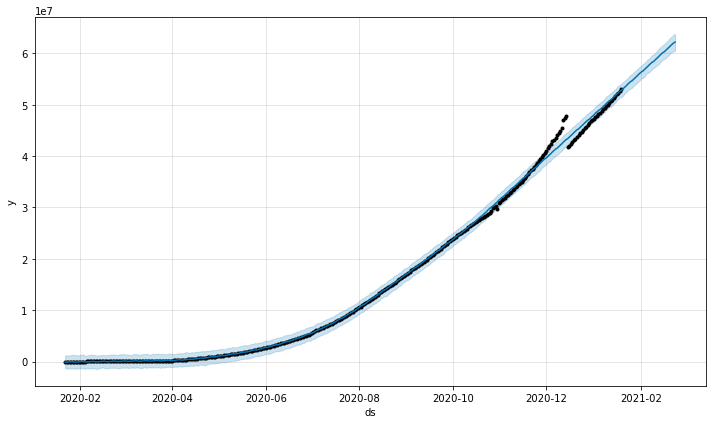

In [76]:
Recovered_forecast_plot = model.plot(Recovered_forecast)

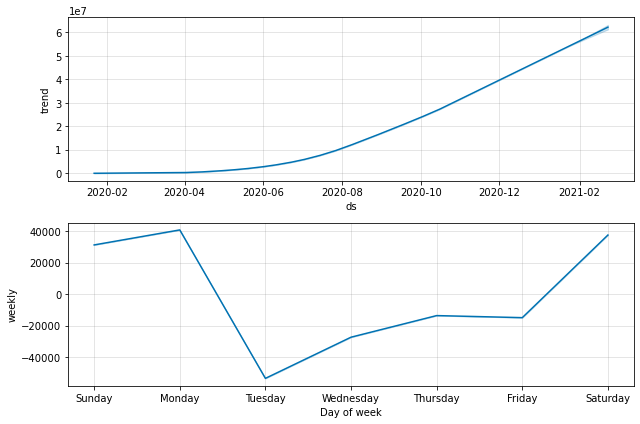

In [77]:
Recovered_forecast_plot_components = model.plot_components(Recovered_forecast)

# Thankyou